In [7]:
from base import MultiDiffusionPlotter, np
from threeD import Solver3D

# Export figures to Folder
figures_path = "../TFG_latex/Figures/Nutrients3D/"

# Results for Different Diffusion Rates
Comparing the diffusion and absorption timescales for the non-dimensionalised **Steady State Diffusion-Absorption Equation**:
$$
\nabla^2 n(r) - \alpha n(r) c(r) = 0
$$
$$
\Rightarrow \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial n}{\partial r}\right)
    - \alpha n(r) c(r) = 0
$$
$r \in [R_{D}, R_{\infty}) \;\; | \;\; L_R := R_{\infty} - R_{D}$

Where, $R_{D}$ is the diatom radius, and $R_{\infty}$ is the radius of the domain, much larger than the diatom radius.

### Timescales

#### Absorption timescale

$$
\tau_c(r) := \frac{1}{\alpha c(r)} \overset{?}{\approx} \frac{1}{\alpha}
$$
$$
\langle \tau_c \rangle
    = \frac{1}{\alpha} \left\langle \frac{1}{c(x)} \right\rangle
    \geq \tau_{\langle c \rangle}
        := \frac{1}{\alpha \langle c \rangle}
$$
###### By the AM-HM inequality. Where, $\langle c \rangle$ is the continuous average of $c(r)$.

___
##### Average concentration
$$
\langle c \rangle
    = \frac{\int_{R_{D}}^{R_{\infty}} c(r) \cdot 4\pi r^2 \, dr}{\int_{R_{D}}^{R_{\infty}} 4\pi r^2 \, dr}
    = \frac{3}{R_{\infty}^3 - R_{D}^3} \int_{R_{D}}^{R_{\infty}} c(r) r^2 \, dr
    \approx \frac{3}{L_R^3} \int_{R_{D}}^{R_{\infty}} c(r) r^2 \, dr
$$

Constraint, total number of diatoms remains constant:
$$
\int_{R_{D}}^{R_{\infty}} c(r) \cdot 4\pi r^2 \; dr = 1
$$
$$
\Rightarrow \langle c \rangle = \frac{3}{4 \pi \, L_R^3}
$$
___
$$
\tau_{\langle c \rangle}
        := \frac{1}{\alpha \langle c \rangle} = \frac{4 \pi L_R^3}{3 \alpha}
        \approx \begin{cases}
            \cancel{\frac{4 (\infty-R_{D})^3}{\alpha} \to \infty \neq 1}       & L_R=R_{\infty}-R_{D} \\
            \frac{4 R_D^3}{\alpha} = 1                                             & L_R=R_D \\
            \color{lightgreen} \frac{\lambda^3}{\alpha} \;\; \text{\scriptsize (depends on c(x))}   & L_R=\lambda
        \end{cases}
$$

#### Diffusion timescale

Is $L$ the length scale over which there is both absorption and diffusion?

$$
\tau_d := \frac{L_D^2}{D}, \;\; L_D = R_d
$$

Since the non-dimensional equation means $D = 1$

#### Comparison
$$
\frac{\tau_{\langle c \rangle}}{\tau_d}
    = \frac{4 \pi}{3} \frac{L_R^3}{\alpha} \cdot \frac{D}{L_D^2}
    = \frac{4 \pi}{3} \frac{L_R^{\cancel{3}}}{\alpha}
$$
___
$$
\cancel{\frac{\tau_{c}}{\tau_{d}}
\begin{cases} 
    \gg 1,  &  \text{Absorption domination}  \\
    \sim 1, &  \text{Comparable time scales} \\
    \ll 1,  &  \text{Diffusion domination}
\end{cases}}
$$

<!--z
⚠️⚠️⚠️
$$
\implies
\tau_c =
\begin{cases} 
10 \\ 
1 \\ 
0.1 
\end{cases}
\; \& \; \tau_d = 1

\implies
\alpha = 
\begin{cases} 
0.1 \\ 
1 \\ 
10 
\end{cases}
$$
⚠️⚠️⚠️
-->

### Definitions & Values

In [8]:
def print_frac(syst_params, lambd):
    Tc = syst_params['Tc']
    Tc_Td = 4*np.pi/3 * Tc * lambd 
    print(f"Tc/Td = {Tc_Td}")

In [ ]:
syst_params = {
'R_dtm' : 1, 'R_inf' : 1000,
'L' : 10, # Length of the plot domain
'Tc': 1e-3,
'nr': 10000,
}
R_dtm, R_inf, L = syst_params['R_dtm'], syst_params['R_inf'], syst_params['L']

print_frac(syst_params, 1) # lamnd = Rd = 1

Tc/Td = 0.0041887902047863905


In [10]:
r0 = 2.5
l = 5
def c_shell(r):
    cond = (r >= r0) & (r <= r0 + l)
    c = 3/(4*np.pi) * 1/(l**3 + 3 * l**2 * r0 + 3 * l * r0**2)
    return np.where(cond , c , 0)

### Plots $\tau_c/\tau_d$ 📄

Timescales seem to be on reverse order of magnitude. This is not what I expected.

When $\color{red} \tau_c/ \tau_d \ll 1$, absorption dominates diffusion.

When $\color{red} \tau_c/ \tau_d \gg 1$, diffusion dominates absorption.

Diffusion
Tc/Td = 9.999999999999998
Comparable
Tc/Td = 0.9999999999999998
Absorption
Tc/Td = 0.09999999999999998


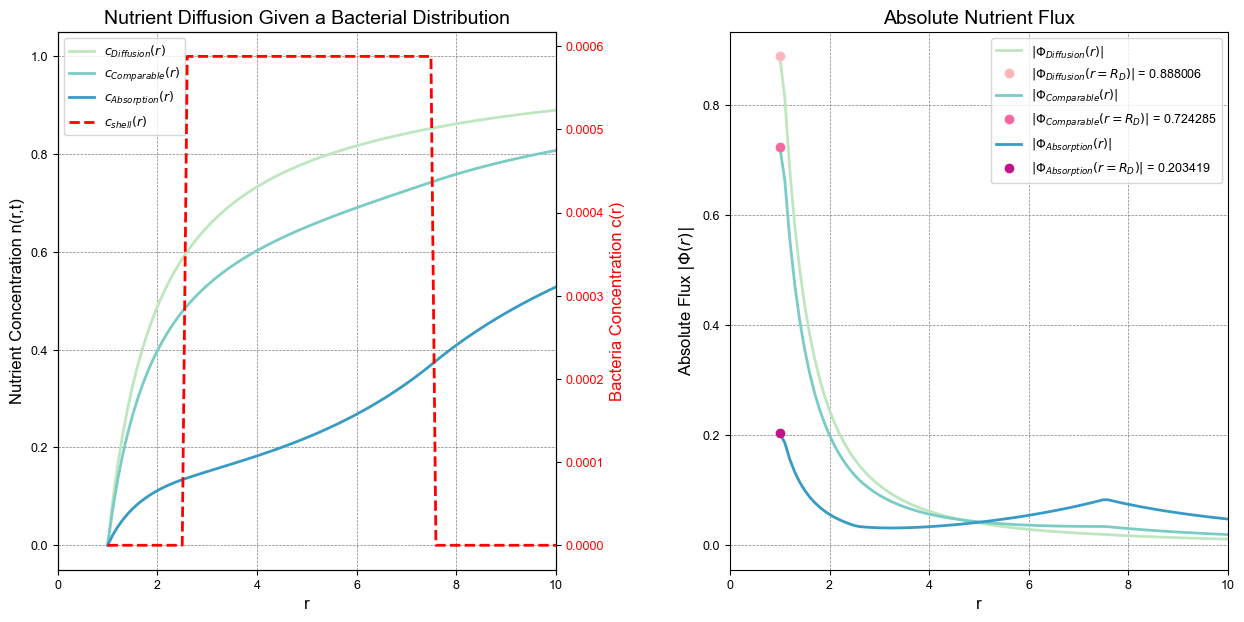

In [11]:
labels = ['Diffusion', 'Comparable', 'Absorption']
Tc_list = [3/(4*np.pi)/l * 1e1, 3/(4*np.pi)/l * 1e0, 3/(4*np.pi)/l * 1e-1]

n_list = []; f_list = []
for i, Tc in enumerate(Tc_list):
    syst_params['Tc'] = Tc
    S3D = Solver3D(syst_params, c_shell)
    S3D.ode.solve()
    n_list.append(S3D.ode.n); f_list.append(S3D.ode.abs_flux)

    print(labels[i])
    print_frac(syst_params, l)
 
plotter = MultiDiffusionPlotter(S3D)
plotter.double_plot(n_list, f_list, labels, xlim=(0, L))
plotter.save(figures_path, 'c_shell_thick(r)_comparison')

Diffusion
Tc/Td = 1.9999999999999998
Comparable
Tc/Td = 0.19999999999999996
Absorption
Tc/Td = 0.019999999999999997


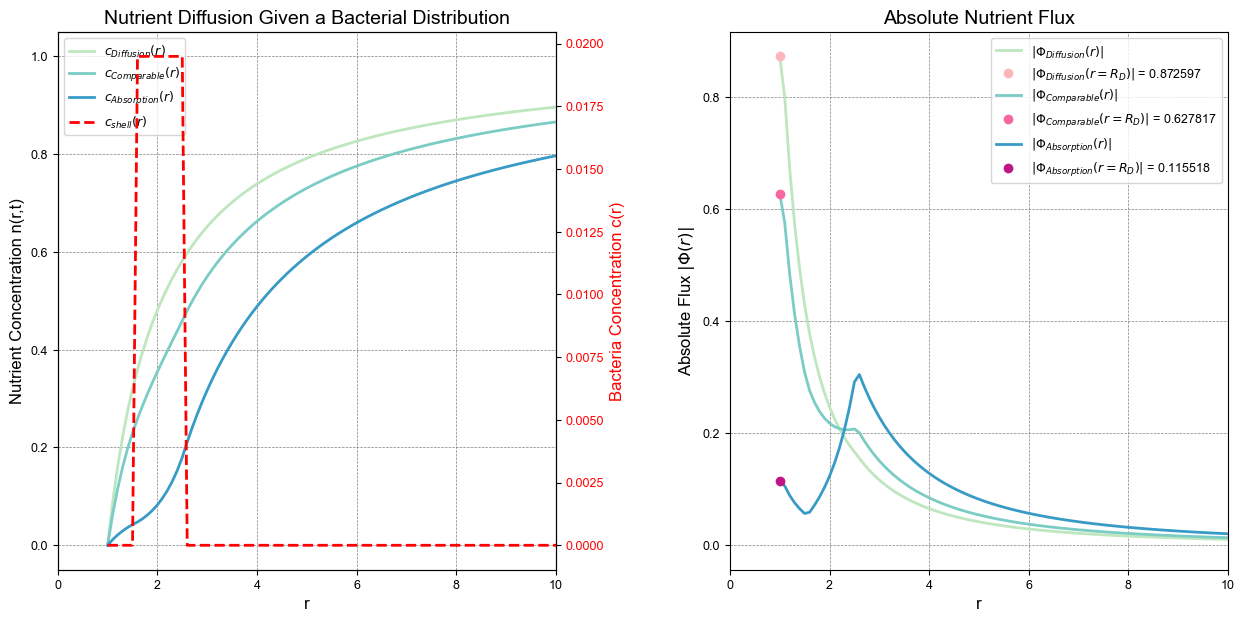

In [ ]:
r0 = 1.5
l= 1
def c_shell2(r):
    cond = (r >= r0) & (r <= r0 + l)
    c = 3/(4*np.pi) * 1/(l**3 + 3 * l**2 * r0 + 3 * l * r0**2)
    return np.where(cond , c , 0)

n_list = []; f_list = []
for i, Tc in enumerate(Tc_list):
    syst_params['Tc'] = Tc
    S3D = Solver3D(syst_params, c_shell2)
    S3D.ode.solve()
    n_list.append(S3D.ode.n); f_list.append(S3D.ode.abs_flux)

    print(labels[i])
    print_frac(syst_params, l)

plotter = MultiDiffusionPlotter(S3D)
plotter.double_plot(n_list, f_list, labels, xlim=(0, L))
plotter.save(figures_path, 'c_shell_thin(r)_comparison')